# **Import Library**

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Processing And Deprocessing**

In [3]:
def load_and_process_image(image_path, max_dim=512):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img * 255.0

def deprocess_image(img):
    img = img[0]
    img = tf.clip_by_value(img, 0, 255)
    img = tf.cast(img, tf.uint8)
    return img

# **Display Image**

In [4]:
def show_image(init_image, title):
    image = init_image


    image = image[0]

    plt.imshow(tf.cast(image, tf.float32) / 255.0)
    if title:
        plt.title(title)
    plt.show()
image_path = '/content/sunflower.jpg'     #content.image
init_image = load_and_process_image(image_path)
processed_image = deprocess_image(init_image)




def save_image(image, file_path):
    img = tf.cast(image, tf.uint8)
    encoded_img = tf.image.encode_jpeg(img)
    tf.io.write_file(file_path, encoded_img)
    print(f"Image saved to {file_path}")

# **Model VGG19**

In [5]:
def get_vgg_model(style_layers, content_layer):
    vgg = VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    style_outputs = [vgg.get_layer(name).output for name in style_layers]
    content_output = vgg.get_layer(content_layer).output
    model_outputs = style_outputs + [content_output]

    return Model(vgg.input, model_outputs)


style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
content_layer = 'block5_conv2'

num_style_layers = len(style_layers)


model = get_vgg_model(style_layers, content_layer)
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,304,768 (58.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15,304,768 (58.38 MB)

# **Loss Function**

In [7]:
def content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))


def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
    return result / num_locations


def style_loss(base_style, gram_target):
    gram_style = gram_matrix(base_style)
    return tf.reduce_mean(tf.square(gram_style - gram_target))


def total_variation_loss(image):
    x_deltas = image[:, :-1, :-1, :] - image[:, 1:, :-1, :]
    y_deltas = image[:, :-1, :-1, :] - image[:, :-1, 1:, :]
    return tf.reduce_mean(x_deltas**2) + tf.reduce_mean(y_deltas**2)

# **SRCNN Model**

In [8]:
def srcnn_model():
    model = tf.keras.Sequential()

#Layer 1

    model.add(layers.Conv2D(64, (9, 9), activation='relu', padding='same', input_shape=(None, None, 3)))

#Layer 2

    model.add(layers.Conv2D(32, (1, 1), activation='relu', padding='same'))

#Output Layer

    model.add(layers.Conv2D(3, (5, 5), activation='linear', padding='same'))

    return model

srcnn = srcnn_model()
srcnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, None, None, 64)      │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, None, None, 32)      │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, None, None, 3)       │           2,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,099 (78.51 KB)

 Trainable params: 20,099 (78.51 KB)

 Non-trainable params: 0 (0.00 B)

# **Loss for Style Transfer**

In [9]:
def compute_loss(model, init_image, gram_style_features, content_features, style_weight=1e-2, content_weight=1e4):
    model_outputs = model(init_image)
    style_outputs = model_outputs[:num_style_layers]
    content_output = model_outputs[num_style_layers:]

# Calc style loss

    style_score = 0
    for target_style, comb_style in zip(gram_style_features, style_outputs):
        style_score += style_loss(comb_style, target_style)
    style_score *= style_weight / num_style_layers

# Calc content loss

    content_score = content_loss(content_output[0], content_features[0])
    content_score *= content_weight

# Total loss

    total_loss = style_score + content_score
    return total_loss

# **Training Steps**

In [10]:
@tf.function()

def train_step(init_image, model, gram_style_features, content_features, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, init_image, gram_style_features, content_features)
        loss += total_variation_loss(init_image)


    grad = tape.gradient(loss, init_image)
    optimizer.apply_gradients([(grad, init_image)])
    init_image.assign(tf.clip_by_value(init_image, 0.0, 255.0))

    return loss

# **Load Image and Exract Feature**

In [11]:
content_image = load_and_process_image(image_path)
style_image = load_and_process_image('/content/art0.jpeg')          #style.image


def get_feature_representations(model, content_image, style_image):
    style_outputs = model(style_image)
    content_output = model(content_image)


    style_features = [style_layer for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_output[num_style_layers]]

    return style_features, content_features


style_features, content_features = get_feature_representations(model, content_image, style_image)
gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

# Target image with the content image
init_image = tf.Variable(content_image, dtype=tf.float32)


optimizer = tf.optimizers.Adam(learning_rate=0.02)

# **Style Transfer**

Epoch 0/20000 - Loss: 3027905792.0


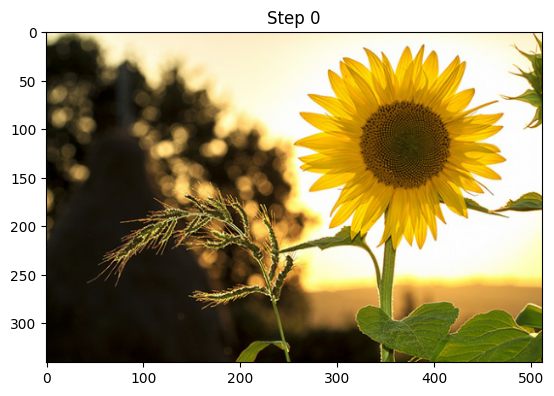

Epoch 100/20000 - Loss: 2666670336.0


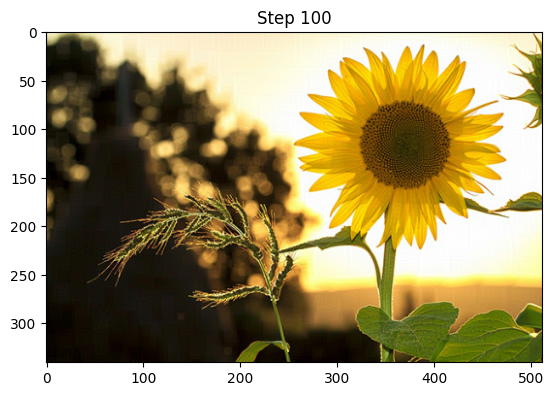

Epoch 200/20000 - Loss: 2315990528.0


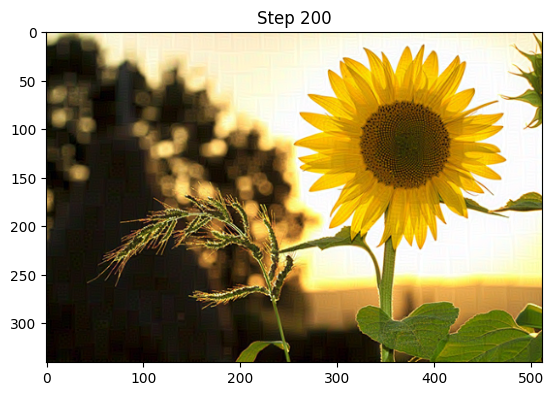

Epoch 300/20000 - Loss: 2003827584.0


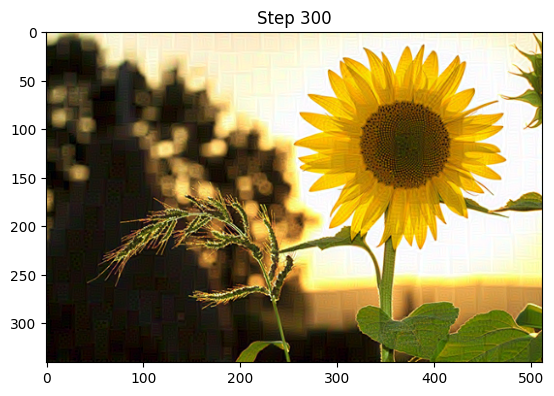

Epoch 400/20000 - Loss: 1742243328.0


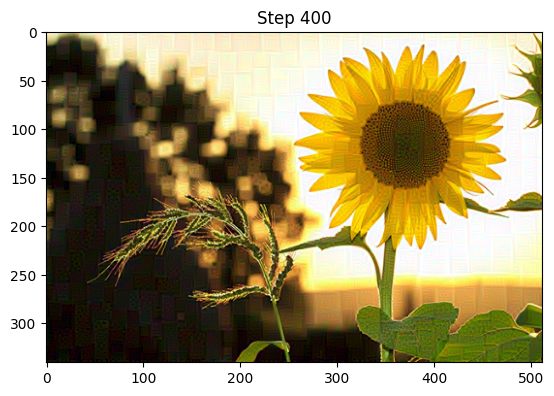

KeyboardInterrupt: 

In [12]:
epochs = 20000
for epoch in range(epochs):
    loss = train_step(init_image, model, gram_style_features, content_features, optimizer)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.numpy()}")
        show_image(init_image, title=f"Step {epoch}")


# **Save Image**

In [ ]:
print(f"Original Image Shape: {init_image.shape}")

if len(init_image.shape) == 4:
    init_image = tf.squeeze(init_image, axis=0)
    print(f"Image after squeezing: {init_image.shape}")

upscale_factor = 2
new_height = init_image.shape[0] * upscale_factor
new_width = init_image.shape[1] * upscale_factor


upscaled_bicubic = tf.image.resize(init_image,
                                    (new_height, new_width),
                                    method='bicubic')


print(f"Bicubic Upscaled Image Shape: {upscaled_bicubic.shape}")

show_image(upscaled_bicubic, title="Bicubic Upscaled Image")
upscaled_bicubic = tf.clip_by_value(upscaled_bicubic, 0, 255)
upscaled_bicubic = tf.cast(upscaled_bicubic, tf.uint8)

save_image(upscaled_bicubic.numpy(), "Final_Output.jpg")
print(f"Original Image Pixel Value Range: [{tf.reduce_min(init_image).numpy()}, {tf.reduce_max(init_image).numpy()}]")
print(f"Bicubic Upscaled Image Pixel Value Range: [{tf.reduce_min(upscaled_bicubic).numpy()}, {tf.reduce_max(upscaled_bicubic).numpy()}]")
